# Notebook of the project of Physics of Complex Systems #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

Firstly, I try to reproduce the mean-field approach. The resulting system of ODEs is the following:
$$
    \frac{\partial x}{\partial t} = \alpha x - \gamma xy , \;\;\;
    \frac{\partial y}{\partial t} = \lambda + \nu xy - \sigma y
$$
where $x$ is the pathogen concentration and $y$ lymphocytes'. \
The parameters represent:
- $\alpha$ : proliferation rate of the pathogen; 
- $\gamma$ : destruction rate of the pathogen by the lymphocytes; 
- $\lambda$ : birth rate of the lymphocyte; 
- $\nu$ : duplication rate of the lymphocyte when encountering the pathogen; 
- $\sigma$ : death rate of the lymphocyte. 


## Mean Field Approach ##

In which regime are we? First regime:(0,y_0) unstable, (x^*,y^*) stable


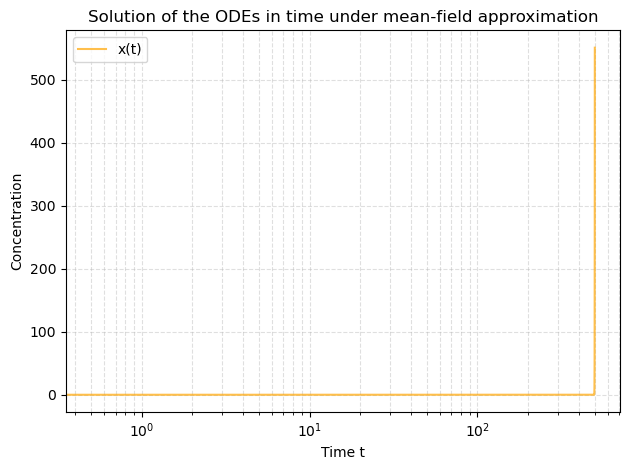

In [2]:
# set initial conditions
z0 = np.array([1,np.random.poisson(lam=1)])    # z=[x,y]

# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.6,
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01
}

# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

# In which regime are we?
print(f'In which regime are we? {'First regime:(0,y_0) unstable, (x^*,y^*) stable' \
    if par['alpha']>(par['lambda']*par['gamma']/par['sigma']) else '\text{Second regime:}(0,y_0) \text{stable}, (x^*,y^*) \text{unstable}'}')

def system(z:np.ndarray ,t:np.ndarray ,par:dict):
    
    x, y = z
    dxdt = par['alpha']*x - par['gamma']*x*y
    dydt = par['lambda'] + par['nu']*x*y - par['sigma']*y
    return [dxdt,dydt]

# set the time span 
#t_s = np.linspace(0,int(1e4),int(1e5))
t_s = np.linspace(0,500,1000)      # credo sia questo il time step che hanno usato

# Solve
X_ode = odeint(system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(system,z0,t_s,args=(par,))[:,1]

# Normalization
X_ode = X_ode/np.mean(X_ode)
Y_ode = X_ode/np.mean(Y_ode)

# Solution of the X ODE
#plt.figure(figsize=(12,8))
plt.plot(t_s, X_ode, c='orange', label='x(t)',alpha=0.7)
plt.title('Solution of the ODEs in time under mean-field approximation')
#plt.plot(t_s,Y,c='magenta',label='y(t)',alpha=0.7)
plt.xlabel('Time t')
plt.ylabel('Concentration')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


Now I recreate the trajectory of the solutions of the ODE

In which regime are we? First regime:(0,y_0) unstable, (x^*,y^*) stable


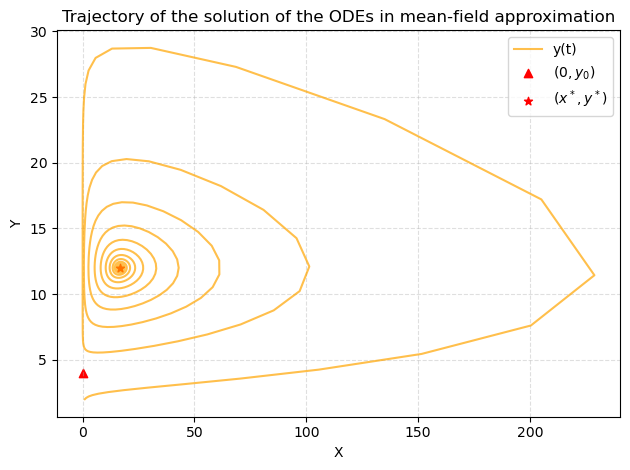

In [3]:
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,
    'gamma': 0.1,   # questo sarebbe 0.01
    'lambda': 0.4,
    'nu': 0.004,
    'sigma': 0.1,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}

# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

# In which regime are we?
print(f'In which regime are we? {'First regime:(0,y_0) unstable, (x^*,y^*) stable' \
    if par['alpha']>(par['lambda']*par['gamma']/par['sigma']) else '\text{Second regime:}(0,y_0) \text{stable}, (x^*,y^*) \text{unstable}'}')

def system(z:np.ndarray ,t:np.ndarray ,par:dict):
    
    x, y = z
    dxdt = par['alpha']*x - par['gamma']*x*y
    dydt = par['lambda'] + par['nu']*x*y - par['sigma']*y
    return [dxdt,dydt]

# Solve
X_ode = odeint(system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(system,z0,t_s,args=(par,))[:,1]

# Trajectory of the solutions over time
plt.plot(X_ode, Y_ode, c='orange', label='y(t)',alpha=0.7)
plt.title('Trajectory of the solution of the ODEs in mean-field approximation')
plt.scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
plt.scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


## Lattice ##
The interactions between pathogens and lymphocytes are described by the following reactions:
$$
\begin{gather}
    X \xrightarrow{\alpha} X + X \\
    \emptyset \xrightarrow{\lambda} Y \\
    X + Y \xrightarrow{\gamma} Y  \\
    X + Y \xrightarrow{\nu} X + 2Y \\
    Y \xrightarrow{\sigma} \emptyset .
\end{gather}
$$

### 1D ##
Firstly, I try a toy model of a 1D lattice with 100 cells and no diffusion (mean-field approximation):

In which regime are we? First regime:(0,y_0) unstable, (x^*,y^*) stable


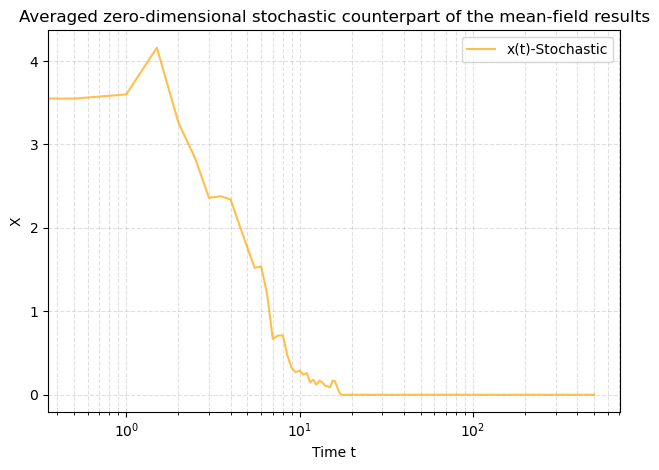

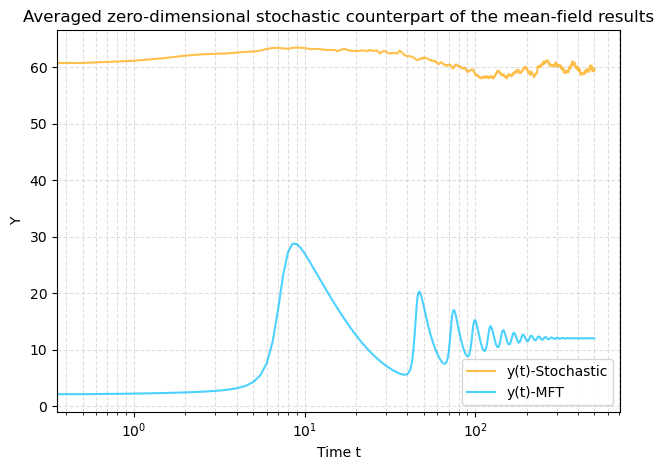

In [14]:
def check_sign(cell):
    # If in any cell x or y are negative, set it to zero
    if cell[0] < 0:
        cell[0] = 0
        
    if cell[1] < 0:
        cell[1] = 0

par = {
    'alpha': 1.6,
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 1.5e-3,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}

# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

# In which regime are we?
print(f'In which regime are we? {'First regime:(0,y_0) unstable, (x^*,y^*) stable' \
    if par['alpha']>(par['lambda']*par['gamma']/par['sigma']) else '\text{Second regime:}(0,y_0) \text{stable}, (x^*,y^*) \text{unstable}'}')

# Time steps
time_steps = 1000

def lattice1(N:int,time_steps:int,par:dict):
    # N: number of cells (default=100)
    
    # Define the lattice
    lattice = np.zeros((N,2))

    # Inizialization    (x_i,y_0) for each site, with x_i = 3, y_0 = \lambda / \sigma
    lattice[:,0] = 3    
    lattice[:,1] = par['lambda'] / par['sigma']

    # Initialize arrays to contain the mean of x and y
    X_stoc = np.zeros(time_steps)
    Y_stoc = np.zeros(time_steps)

    # Loop
    for t in range(time_steps):
        for i in range(len(lattice)):
            lattice[i,0] += np.random.poisson(par['alpha']*lattice[i,0])                # proliferation of the pathogen
            lattice[i,1] += np.random.poisson(par['lambda'])                            # birth of lymphocyte
            lattice[i,0] -= np.random.poisson(par['gamma']*lattice[i,0]*lattice[i,1])   # lymphocyte kills pathogen
            check_sign(lattice[i,:])                                                    # check the sign only after there's a subtraction
            lattice[i,1] += np.random.poisson(par['nu']*lattice[i,0]*lattice[i,1])      # lymphocyte duplication
            lattice[i,1] -= np.random.poisson(par['sigma']*lattice[i,1])
            check_sign(lattice[i,:])

            # calculate the mean of x and y, so to compare it to the mean-field result
            X_stoc[t] = np.mean(lattice[:,0])
            Y_stoc[t] = np.mean(lattice[:,1])
        
        #print(*lattice)                                                                # the asterisk in the print is used to print horizontally
    return X_stoc, Y_stoc 

# Time span
t_s = np.linspace(0,500,time_steps)

# Compute the model
X_stoc, Y_stoc = lattice1(N=100,time_steps=time_steps,par=par)

# plot the evolution of x(t)
#plt.figure(figsize=(12,8))
plt.plot(t_s, X_stoc,c='orange',label='x(t)-Stochastic',alpha=0.7)
#plt.plot(t_s,X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)
plt.title('Averaged zero-dimensional stochastic counterpart of the mean-field results')
plt.xlabel('Time t')
plt.ylabel('X')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# plot the evolution of x(t)
#plt.figure(figsize=(12,8))
plt.plot(t_s, Y_stoc,c='orange',label='y(t)-Stochastic',alpha=0.7)
plt.plot(t_s,Y_ode,c='deepskyblue',label='y(t)-MFT',alpha=0.7)
plt.title('Averaged zero-dimensional stochastic counterpart of the mean-field results')
plt.xlabel('Time t')
plt.ylabel('Y')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


Now I study the disappearance probability at the first pass near zero as a function of the distance between the two stable points.\
I only check for having zero pathogen for the zero-pathogen absorbing state; for now I don't care about Y.

62.56
58.409
65.132
68.018
74.806
63.714
71.814
60.977
63.029
62.118
73.586
70.672
76.739
66.758
62.357
69.093
66.041
65.984
73.972
84.0
73.961
65.828
74.526
66.022
79.683
75.557
73.466
79.685
70.826
72.07
68.156
79.748
74.959
80.319
84.669
79.774
78.696
80.667
77.012
73.38
79.551
74.606
80.898
77.352
86.128
80.599
78.289
81.918
88.615
76.159
92.001
96.821
79.055
92.289
92.36
80.903
92.091
84.682
86.789
79.111
96.034
101.125
104.415
82.251
95.865
88.488
87.431
90.098
91.735
84.682
96.015
89.447
81.781
99.16
102.871
106.851
86.767
80.713
97.59
89.148
111.138
96.621
98.556
93.533
112.702
115.659
103.637
107.858
92.865
110.848
106.07
106.305
110.247
111.236
93.144
111.62
109.573
115.012
100.278
108.138


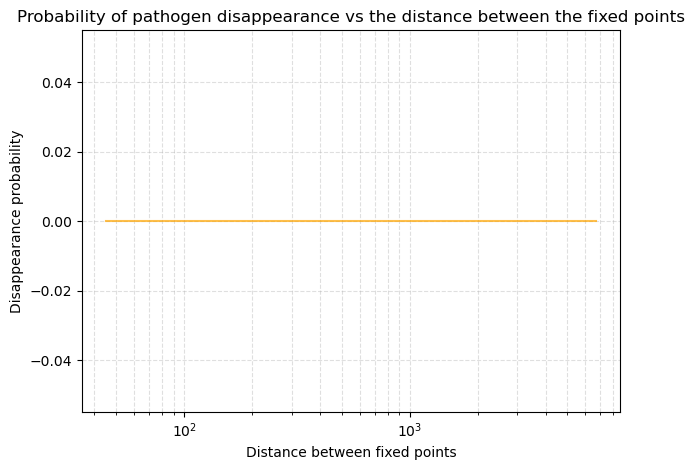

In [12]:
def P_diss(model,num_nu:int,n_iter:int,N:int,time_steps:int,par:dict):
    # Loop over nu, from 1e-5 to 1.5e-3
    nu_values = np.linspace(1e-5,1.5e-3,num_nu)[::-1]                   # I invert the array (doing [::-1] because the distance is inversly proportional to nu)

    # Initialize storing for disapperance probability
    P_d = np.zeros((num_nu,2))
    
    # Compute the distance between the two fixed points for each value of nu
    P_d[:,0] = [np.linalg.norm(np.array([0,par['lambda']/par['sigma']])-
                               np.array([(par['sigma']-par['lambda']*par['gamma']/par['alpha'])/nu,par['alpha']/par['gamma']])) 
                                for nu in nu_values]

    for i,nu in enumerate(nu_values):
        par['nu'] = nu
        for iter in range(n_iter):
            X_stoc, _ = lattice1(N=N,time_steps=time_steps,par=par)
            print(X_stoc[-1])
            if np.isclose(X_stoc[-1],0.0,1e-15):                        # I use np.isclose bc with the == always gives problems
                P_d[i,1] += 1                                          # check if pathogen dissappeared
        P_d[i,1] /= n_iter

    return P_d

par = {
    'alpha': 1.2,
    'gamma': 0.1,   # questo sarebbe 0.01
    'lambda': 0.4,
    'nu': 1e-5,
    'sigma': 0.1,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}

# Compute the disapperance probability
P_d = P_diss(model=lattice1,num_nu=10,n_iter=10,N=1000,time_steps=10,par=par)

# plot the evolution of x(t)
#plt.figure(figsize=(12,8))
plt.plot(P_d[:,0],P_d[:,1],c='orange',alpha=0.7)
plt.title('Probability of pathogen disappearance vs the distance between the fixed points')
plt.xlabel('Distance between fixed points')
plt.ylabel('Disappearance probability')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
# plot the evolution of x(t)
#plt.figure(figsize=(12,8))
plt.plot(P_d[:,0],P_d[:,1],c='orange',label='',alpha=0.7)
plt.title('Probability of pathogen disappearance vs the distance between the fixed points')
plt.xlabel('Distance between fixed points')
plt.ylabel('Disappearance probability')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()